# Week 15, Lecture 02 CodeAlong: Hypothesis Testing

- 01/14/2022

Today, we will be analyzing data from the Crowdfunding website Kiva and answering several questions about the data.

- Use your hypothesis testing skills and the  ["Guide: Choosing the Right Hypothesis Test"](https://login.codingdojo.com/m/376/12533/88117) lesson from the LP.
    

- Kiva Crowdfunding Data Set:
    -  https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding 



### Questions to Answer

- Q1: Do all-male teams get more funding vs teams that include at least 1 female?
- Q2: Do different sectors get more/less funding?

# Hypothesis Testing

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
## load the kiva_loans.csv. display info and head
df = pd.read_csv('Data/kiva_loans.csv.gz')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666984 entries, 0 to 666983
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  666984 non-null  int64  
 1   funded_amount       666984 non-null  float64
 2   loan_amount         666984 non-null  float64
 3   activity            666984 non-null  object 
 4   sector              666984 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        666976 non-null  object 
 7   country             666984 non-null  object 
 8   region              614405 non-null  object 
 9   currency            666984 non-null  object 
 10  partner_id          653896 non-null  float64
 11  posted_time         666984 non-null  object 
 12  disbursed_time      665003 non-null  object 
 13  funded_time         619335 non-null  object 
 14  term_in_months      666984 non-null  float64
 15  lender_count        666984 non-nul

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [3]:
## Drop null values from related columns
df = df.dropna(subset=['borrower_genders','funded_amount'])

# Setting the id as the index
df = df.set_index('id')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666984 entries, 653051 to 1340339
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       666984 non-null  float64
 1   loan_amount         666984 non-null  float64
 2   activity            666984 non-null  object 
 3   sector              666984 non-null  object 
 4   use                 666973 non-null  object 
 5   country_code        666976 non-null  object 
 6   country             666984 non-null  object 
 7   region              614405 non-null  object 
 8   currency            666984 non-null  object 
 9   partner_id          653896 non-null  float64
 10  posted_time         666984 non-null  object 
 11  disbursed_time      665003 non-null  object 
 12  funded_time         619335 non-null  object 
 13  term_in_months      666984 non-null  float64
 14  lender_count        666984 non-null  int64  
 15  tags                496877 n

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
id,,,,,,,,,,,,,,,,,,,
653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


# Q1:  Do all-male teams get more funding vs teams that include at least 1 female?

## 1. State the Hypothesis & Null Hypothesis 

- $H_0$ (Null Hypothesis): no difference in funding amount between all male teams and at least one female team 
- $H_A$ (Alternative Hypothesis): All male teams have a difference in funding than teams with at least 1 female. 

## 2. Determine the correct test to perform.
- Type of Data? numeric
- How many groups/samples? two
- Therefore, which test is appropriate? 2 sample T test

### Visualize and separate data for hypothesis

- What column is our target?
- What column determines our groups?

In [5]:
## check the col that contains the measurement
df['funded_amount'].value_counts()

225.0      34241
300.0      30565
200.0      27366
500.0      27129
250.0      26622
           ...  
6010.0         1
27000.0        1
390.0          1
15.0           1
46125.0        1
Name: funded_amount, Length: 599, dtype: int64

In [6]:
## check the col that contains info on gender
df['borrower_genders'].value_counts()

female                                                                                                                                                                                                                          426502
male                                                                                                                                                                                                                            134710
female, female                                                                                                                                                                                                                   12164
female, female, female                                                                                                                                                                                                           11676
female, female, female, female                                              

In [7]:
## create a column that easily separates our groups
df['has_female'] = df['borrower_genders'].str.contains('female')
df['has_female'].value_counts()

True     528461
False    138523
Name: has_female, dtype: int64

In [8]:
## save list of columns needed for each group
needed_cols = ['funded_amount','has_female']
df[needed_cols]

,funded_amount,has_female
id,,
653051,300.0,True
653053,575.0,True
653068,150.0,True
653063,200.0,True
653084,400.0,True
...,...,...
1340318,0.0,True
1340323,0.0,True
1340316,25.0,True


In [9]:
## save male team in separate variable
male_df = df.loc[df['has_female']==False,needed_cols]
male_df

,funded_amount,has_female
id,,
653418,450.0,False
653170,3175.0,False
653432,550.0,False
1080150,125.0,False
653410,1075.0,False
...,...,...
1339703,0.0,False
1339831,50.0,False
1339701,125.0,False


In [10]:
## save female team in separate variables
female_df = df.loc[ df['has_female']==True, needed_cols]
female_df

,funded_amount,has_female
id,,
653051,300.0,True
653053,575.0,True
653068,150.0,True
653063,200.0,True
653084,400.0,True
...,...,...
1340318,0.0,True
1340323,0.0,True
1340316,25.0,True


In [11]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([male_df,female_df])
plot_df

,funded_amount,has_female
id,,
653418,450.0,False
653170,3175.0,False
653432,550.0,False
1080150,125.0,False
653410,1075.0,False
...,...,...
1340318,0.0,True
1340323,0.0,True
1340316,25.0,True


<AxesSubplot: xlabel='has_female', ylabel='funded_amount'>

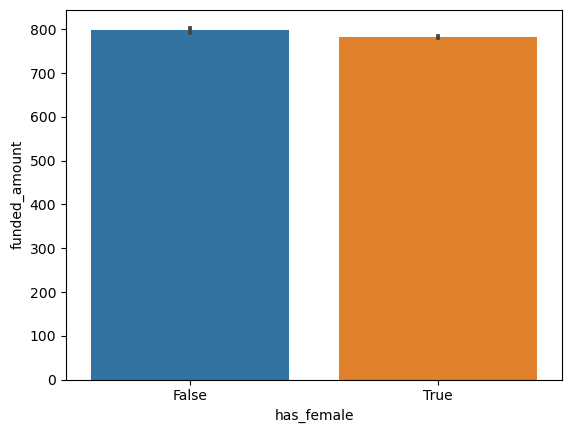

In [12]:
## visualize the group means
sns.barplot(data=df,x='has_female',y='funded_amount')

## 3. Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [13]:
## Saving JUST the numeric col as final group variables
male_group = male_df['funded_amount']
female_group = female_df['funded_amount']


In [14]:
## Check female group for outliers
female_outliers = np.abs(stats.zscore(female_group)) > 3

## how many outliers?
female_outliers.value_counts()

False    515117
True      13344
Name: funded_amount, dtype: int64

In [15]:
## remove outliers from female_group
female_group = female_group[~female_outliers]

In [17]:
## Check male group for outliers
male_outliers = np.abs(stats.zscore(male_group))>3
## how many outliers?
male_outliers.value_counts()


False    136771
True       1752
Name: funded_amount, dtype: int64

In [18]:
## remove outliers from male_group
male_group = male_group[~male_outliers]
male_group

id
653418      450.0
653170     3175.0
653432      550.0
1080150     125.0
653410     1075.0
            ...  
1339703       0.0
1339831      50.0
1339701     125.0
1339668     175.0
1339743       0.0
Name: funded_amount, Length: 136771, dtype: float64

### Test for Normality

In [19]:
## Check female group for normality
result = stats.normaltest(female_group)
result

NormaltestResult(statistic=254918.2167882442, pvalue=0.0)

p<alpha , we reject the null hypothesis

we pass the nomality test as sample size is >15

In [ ]:
## Check n for female group


In [ ]:
## Check male group for normality


In [ ]:
## Check n for male group


- Did we meet the assumption?

### Test for Equal Variances

In [20]:
## Use Levene's test for equal variance
result = stats.levene(female_group,male_group)
result

LeveneResult(statistic=59.19804480808947, pvalue=1.427735962793746e-14)

In [21]:
## Use an if-else to help interpret the p-value
if result.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


- Did we meet the assumptions?

## Final Hypothesis Test

- Did we meet our test's assumptions? 
    - If not, what is the alternative test?

In [23]:
## run final hypothess test
result = stats.ttest_ind(female_group,male_group,equal_var=False,alternative='less')
result

Ttest_indResult(statistic=-29.74961820258417, pvalue=2.051428648879969e-194)

In [24]:
## make a plot or calcualte group means to know which group had more/less.
female_group.mean()

652.9337897992107

In [25]:
male_group.mean()

709.4942275774836

- Final Conclusion:
We had p value <0.05 for the test. So, we reject the null hypothesis and support the alternate hypothesis. Teams with at least one female receive smaller funded amount than all males team

# Q2: Do different sectors get more/less funding?

## 1. State the Hypothesis & Null Hypothesis 

- $H_0$ (Null Hypothesis): 
- $H_A$ (Alternative Hypothesis):  

## 2. Determine the correct test to perform.

- Type of Data?
- How many groups/samples?
- Therefore, which test is appropriate?

In [26]:
## how many sectors?
df['sector'].nunique()

15

### Visualize and separate data for hypothesis

- What column is our target?
- What column determines our groups?

<AxesSubplot: xlabel='sector', ylabel='funded_amount'>

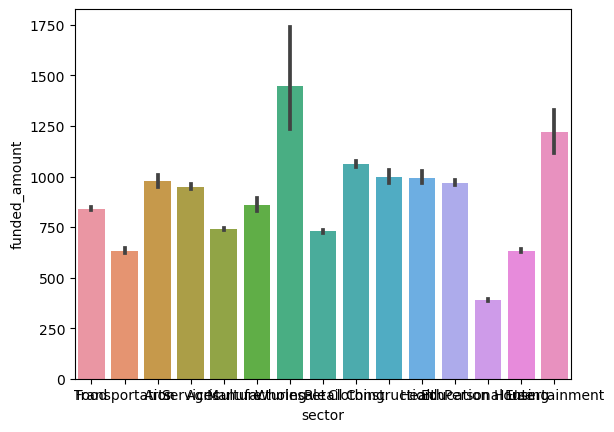

In [27]:
## barplot
sns.barplot(data=df, x='sector', y = 'funded_amount')

In [32]:
sector_names = df['sector'].unique()
sector_names

array(['Food', 'Transportation', 'Arts', 'Services', 'Agriculture',
       'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction',
       'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment'],
      dtype=object)

In [34]:
## Create a dictionary with each group as key and funded_amount as values
groups = {}
for sector in sector_names:
    temp = df.loc[df['sector'] == sector, 'funded_amount']
    groups[sector] = temp


In [35]:
## check one of the sectors in the dict
groups['Food']

id
653051      300.0
653084      400.0
653048      625.0
653065      250.0
653055      350.0
            ...  
1338707    2650.0
1338799      50.0
1338859       0.0
1338682    3525.0
1339743       0.0
Name: funded_amount, Length: 135749, dtype: float64

## 3. Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [38]:
groups_clean = {}
## Loop through groups dict
for sector_name, grp_data in groups.items():
    
    ## determine if there are any outliers
    idx_outliers = np.abs(stats.zscore(grp_data)) > 3
    ## print a statement about how many outliers for which group name
    print(f'there were {idx_outliers.sum()} outliers in {sector_name}')

    ## Remove the outiers from data and overwrite the sector data in the dict
    grp_data_cln = grp_data[idx_outliers == False]
    groups_clean[sector_name] = grp_data_cln
    


there were 3994 outliers in Food
there were 231 outliers in Transportation
there were 273 outliers in Arts
there were 1253 outliers in Services
there were 2478 outliers in Agriculture
there were 95 outliers in Manufacturing
there were 4 outliers in Wholesale
there were 3007 outliers in Retail
there were 857 outliers in Clothing
there were 151 outliers in Construction
there were 109 outliers in Health
there were 473 outliers in Education
there were 563 outliers in Personal Use
there were 590 outliers in Housing
there were 17 outliers in Entertainment


### Test for Normality

In [39]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for sector_name, sector_data in groups_clean.items() :
    ## calculate normaltest results
    result = stats.normaltest(sector_data)
    
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([sector_name, len(sector_data), result.pvalue, result.pvalue < 0.05])
    
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
norm_results

[['group', 'n', 'pval', 'sig?'],
 ['Food', 131755, 0.0, True],
 ['Transportation', 15224, 0.0, True],
 ['Arts', 11721, 0.0, True],
 ['Services', 43446, 0.0, True],
 ['Agriculture', 176746, 0.0, True],
 ['Manufacturing', 6063, 0.0, True],
 ['Wholesale', 622, 6.93178929374469e-92, True],
 ['Retail', 120751, 0.0, True],
 ['Clothing', 31623, 0.0, True],
 ['Construction', 6043, 0.0, True],
 ['Health', 9063, 0.0, True],
 ['Education', 30364, 0.0, True],
 ['Personal Use', 35684, 0.0, True],
 ['Housing', 32981, 0.0, True],
 ['Entertainment', 803, 2.434681423094955e-72, True]]

In [40]:
result = pd.DataFrame(norm_results[1:], columns = norm_results[0])
result

,group,n,pval,sig?
0,Food,131755,0.000000e+00,True
1,Transportation,15224,0.000000e+00,True
2,Arts,11721,0.000000e+00,True
3,Services,43446,0.000000e+00,True
4,Agriculture,176746,0.000000e+00,True
5,Manufacturing,6063,0.000000e+00,True
6,Wholesale,622,6.931789e-92,True
7,Retail,120751,0.000000e+00,True
8,Clothing,31623,0.000000e+00,True
9,Construction,6043,0.000000e+00,True


- Did we meet the assumption?

### Test for Equal Variances

In [41]:
## DEMO: using the * operator to unpack lists
a_list = ['a','b','c']
b_list = [1,2,3]
new_list= [*a_list, *b_list]
new_list

['a', 'b', 'c', 1, 2, 3]

In [42]:
## Use Levene's test for equal variance
stats.levene(*groups_clean.values())

LeveneResult(statistic=941.8381341090084, pvalue=0.0)

In [ ]:
## Use an if-else to help interpret the p-value


- Did we meet the assumption?


## Final Hypothesis Test

- Did we meet our test's assumptions? 
    - If not, what is the alternative test?

In [43]:
## Run final test and get p-value
stats.kruskal(*groups_clean.values())

KruskalResult(statistic=36348.9897834356, pvalue=0.0)

- Interpret Results. Did we have a significant result?
- Is a post-hoc test needed?

[Text(0, 0, 'Food'),
 Text(1, 0, 'Transportation'),
 Text(2, 0, 'Arts'),
 Text(3, 0, 'Services'),
 Text(4, 0, 'Agriculture'),
 Text(5, 0, 'Manufacturing'),
 Text(6, 0, 'Wholesale'),
 Text(7, 0, 'Retail'),
 Text(8, 0, 'Clothing'),
 Text(9, 0, 'Construction'),
 Text(10, 0, 'Health'),
 Text(11, 0, 'Education'),
 Text(12, 0, 'Personal Use'),
 Text(13, 0, 'Housing'),
 Text(14, 0, 'Entertainment')]

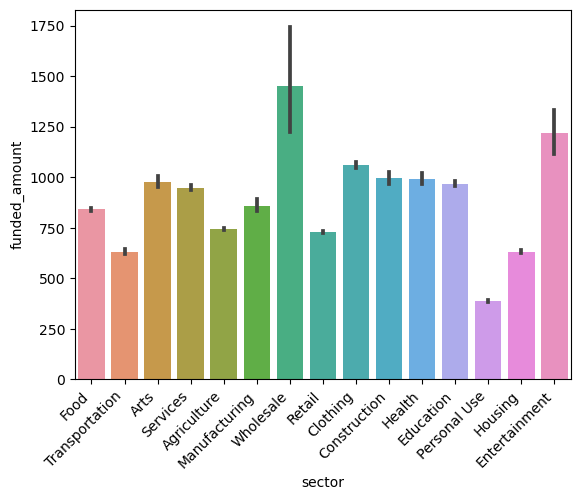

In [44]:
ax= sns.barplot(data = df, x='sector', y = 'funded_amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha= 'right')

### Post-Hoc Multiple Comparison Test

In [45]:
## Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

- Tukey's test requires a list of group names and a list of measured values. 
- Easiest way to produce and visualize this is to make our groups dict into a dataframe 

#### Testing Converting our Dictionary to a DataFrame

In [ ]:
## slice a test sector
temp = None


In [ ]:
## test making a dataframe from the test sector and filling in the sector name


#### Preparing the new dataframe for Tukey's test in a looop

In [48]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for sector, temp in groups_clean.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'Funded Amount' : temp, 'Sector': sector})
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,Funded Amount,Sector
id,,
653051,300.0,Food
653084,400.0,Food
653048,625.0,Food
653065,250.0,Food
653055,350.0,Food
...,...,...
1325258,1400.0,Entertainment
1326378,300.0,Entertainment
1331821,350.0,Entertainment


In [50]:
## save the values as kg_lost and the labels to the Diet
values = tukeys_data['Funded Amount']
labels = tukeys_data['Sector']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Agriculture,Arts,165.1053,0.0,143.2289,186.9817,True
Agriculture,Clothing,235.2757,0.0,221.2716,249.2798,True
Agriculture,Construction,177.9816,0.0,147.9769,207.9863,True
Agriculture,Education,213.7211,0.0,199.4728,227.9693,True
Agriculture,Entertainment,404.3165,0.0,323.194,485.439,True
Agriculture,Food,14.7386,0.0,6.3906,23.0867,True
Agriculture,Health,236.167,0.0,211.4647,260.8693,True
Agriculture,Housing,-87.0379,0.0,-100.7953,-73.2806,True
Agriculture,Manufacturing,96.7218,0.0,66.765,126.6786,True
Agriculture,Personal Use,-327.2873,0.0,-340.5983,-313.9763,True


[Text(0, 0, 'Food'),
 Text(1, 0, 'Transportation'),
 Text(2, 0, 'Arts'),
 Text(3, 0, 'Services'),
 Text(4, 0, 'Agriculture'),
 Text(5, 0, 'Manufacturing'),
 Text(6, 0, 'Wholesale'),
 Text(7, 0, 'Retail'),
 Text(8, 0, 'Clothing'),
 Text(9, 0, 'Construction'),
 Text(10, 0, 'Health'),
 Text(11, 0, 'Education'),
 Text(12, 0, 'Personal Use'),
 Text(13, 0, 'Housing'),
 Text(14, 0, 'Entertainment')]

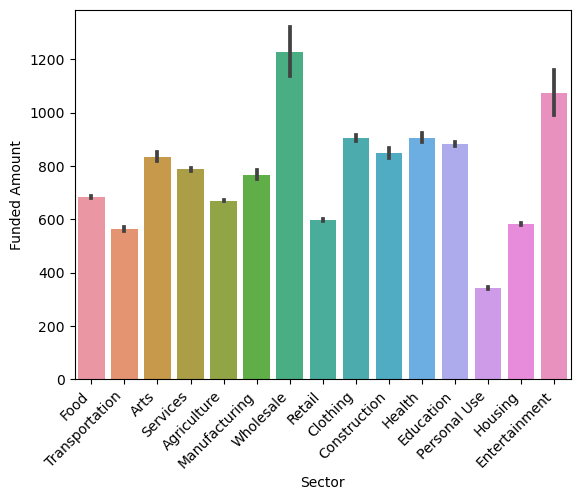

In [52]:
ax= sns.barplot(data = tukeys_data, x='Sector', y = 'Funded Amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha= 'right')

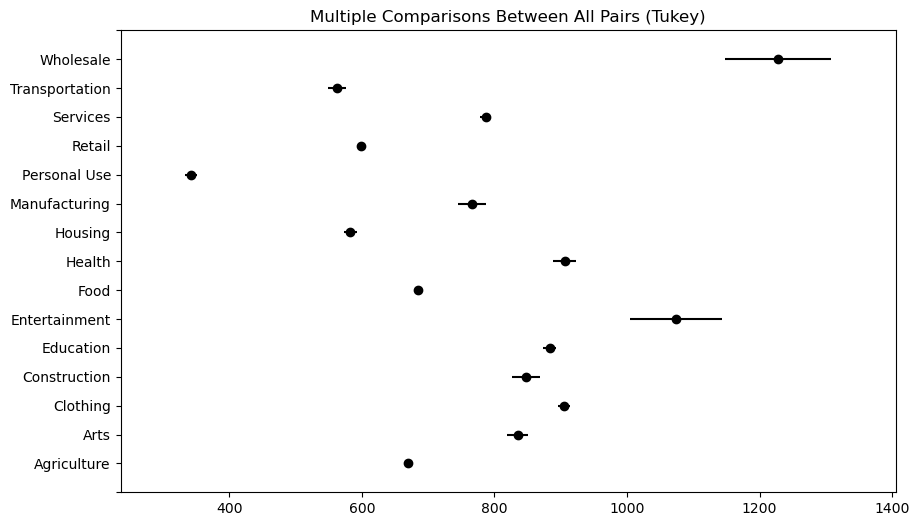

In [53]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous(); 

- Final summary of group differences

In [ ]:
Whosale and Entertainment are the most diffent groups than others. 